In [59]:
from LoaderTools.libs import LibsLoader
from AnalysisTools.analytics import AnalyticsToolkit
from AnalysisTools import visual
from matplotlib.gridspec import GridSpec


import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload

In [3]:
%autoreload 1
%autoreload 2

# 1. Intialize Data Handler Module

This module handles data loading, preprocessing tools (baseline removal and normalization), and well as feature extraction

In [4]:
fname = r"E:/Data/Data_LIBS/ForHolo/wrench_map"
data_handler = LibsLoader(fname)
data_handler.load_dataset(baseline_corrected = True)

In [100]:
data_handler.normalize_to_sum()

## 1.1 Feature Extraction

In [102]:
data_handler.automatic_feature_extraction(fft_features = 20,
                                          intens_features = 20,
                                          sigma = 1,
                                          force_recal = True)

Performing the SIR algorithm...
Operation Completed.


# 2. Initialize the Analytics module

This module handles the is used to generate a database of element emission lines, and perform emission line identification

In [103]:
analytics = AnalyticsToolkit()
# analytics.update_elements(['V', 'Fe', 'Na', 'O', 'Cu', 'Al', 'Ag', 'Au', 'Li', 'Ti', 'Cr'])

In [104]:
counts = analytics.identify_from_elements(spectral_cube = data_handler.dataset,
                                            wavelengths = data_handler.wavelengths,
                                            operation = 'average',
                                            min_intensity = 0.1,
                                            return_counts = True)

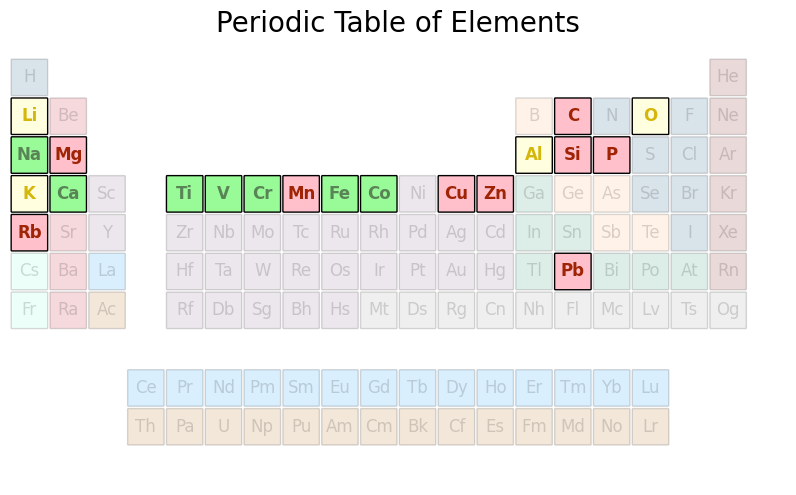

In [105]:
visual.plot_preiodic_table(counts)

In [106]:
counts = analytics.identify_from_features(x_features = data_handler.x_features,
                                            min_intensity = 0.1,
                                            return_counts = True)

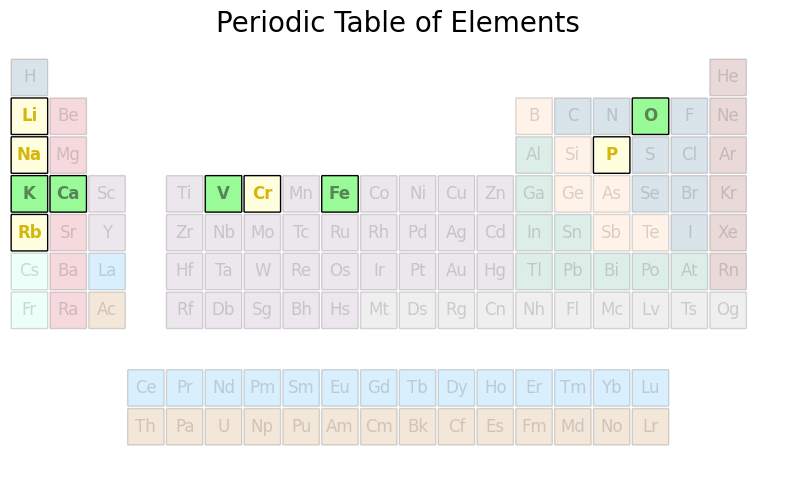

In [107]:
visual.plot_preiodic_table(counts)

## 2.1 Classify

In [108]:
labels = analytics.clustering(model = 'kmeans', 
                               n_clusters = 4, 
                               feature_cube = data_handler.features, 
                               scaler = 'minmax',
                               random_state = 10)

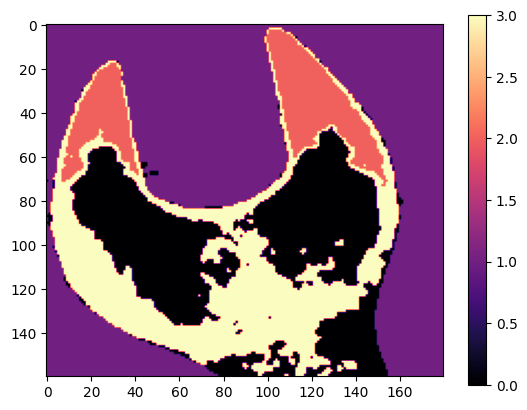

In [109]:
plt.figure()
plt.imshow(labels, cmap = 'magma')
plt.colorbar()

In [128]:
counts = analytics.identify_on_cluster(spectral_cube = data_handler.dataset,
                                       wavelengths = data_handler.wavelengths,
                                       tolerance = 0.05,
                                       min_intensity = 0.1,
                                       return_counts = True,
                                       cluster_number = 2
                                       )

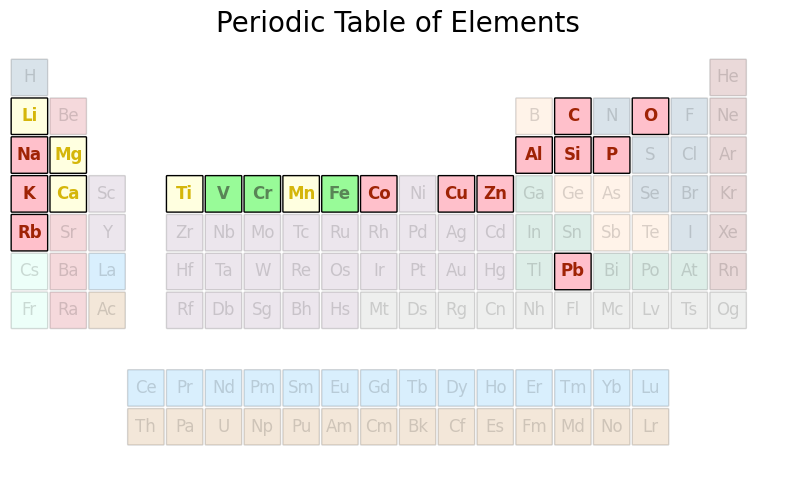

In [129]:
visual.plot_preiodic_table(counts)

# 3. Build an interface

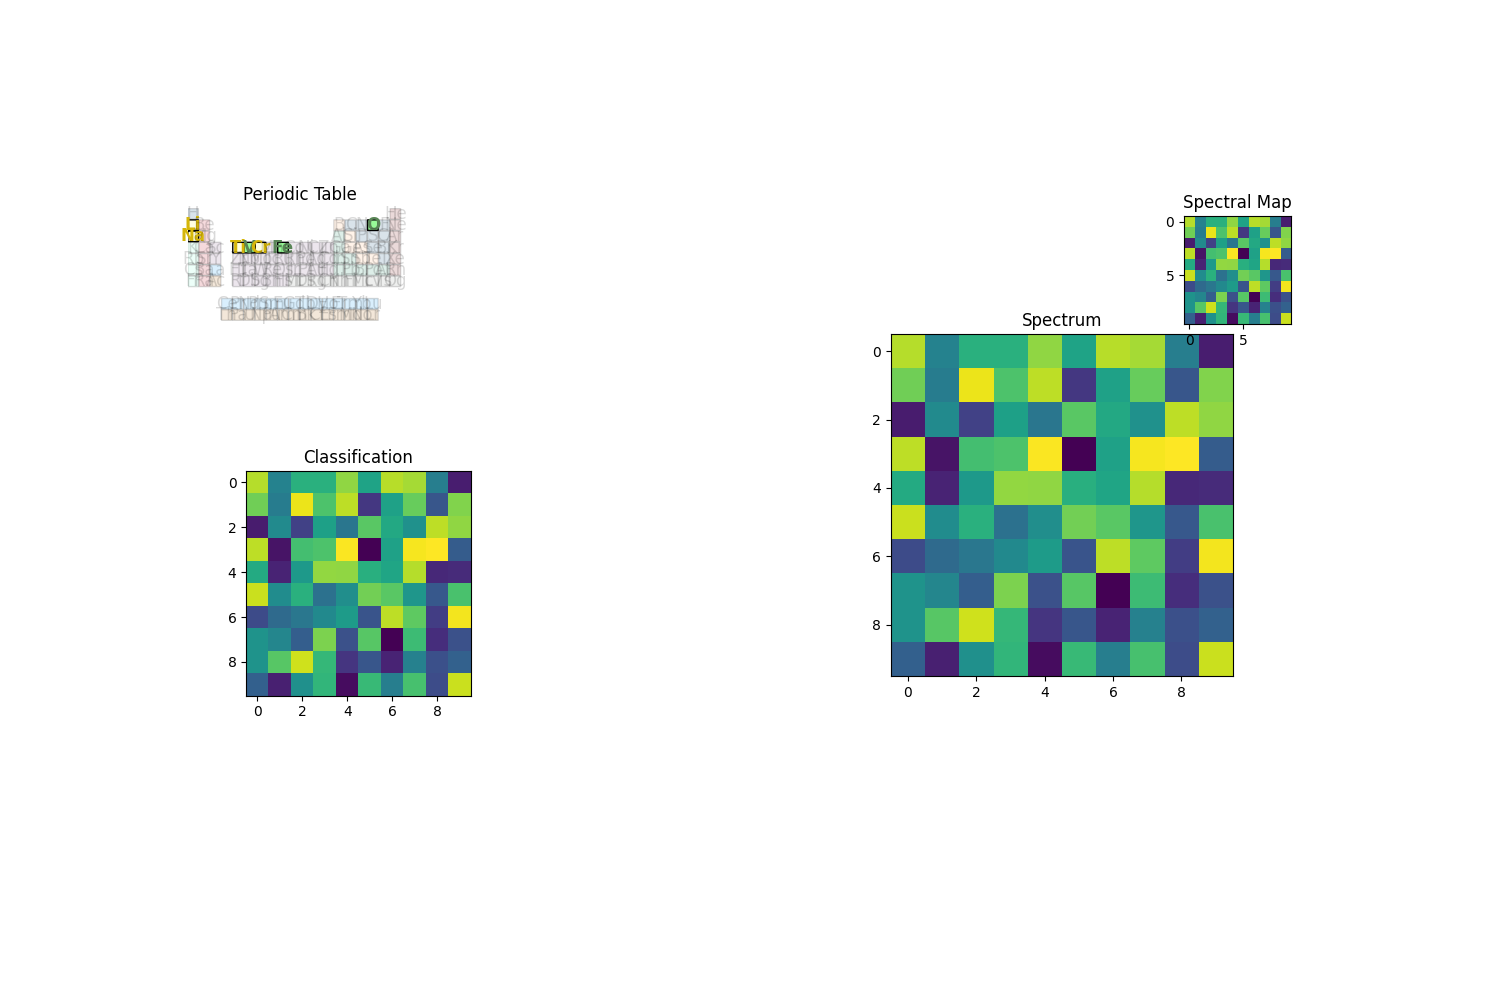

In [166]:
%matplotlib widget
mockup = np.random.random((10, 10))

fig = plt.figure(figsize = (15, 10))

gs = GridSpec(10, 20, figure = fig)

ax1 = fig.add_subplot(gs[0:4, 0:4])
ax1.set_title('Periodic Table')
visual.plot_preiodic_table(counts, ax = ax1)

ax2 = fig.add_subplot(gs[2:10, 1:5])
ax2.set_title('Classification')
ax2.imshow(mockup)

ax3 = fig.add_subplot(gs[2:8, 12:18])
ax3.set_title('Spectrum')
ax3.imshow(mockup)

ax4 = fig.add_subplot(gs[1:3, 17:19])
ax4.set_title('Spectral Map')
ax4.imshow(mockup)